# Create some data

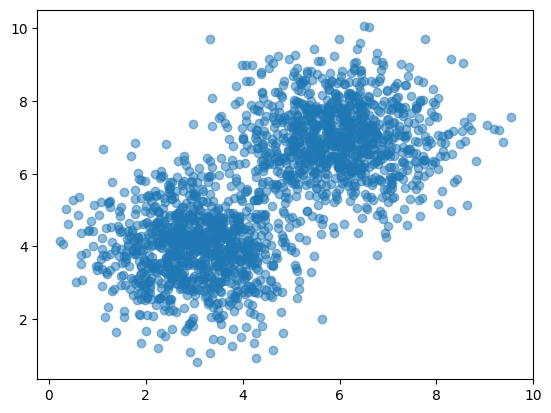

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

mean_1 = [3, 4]
cov_1 = [[1, 0], [0, 1]]
points_1 = np.random.multivariate_normal(mean_1, cov_1, size=1000)

mean_2 = [6,7]
cov_2 = [[1, 0], [0, 1]]
points_2 = np.random.multivariate_normal(mean_2, cov_2, size=1000)

X = np.vstack((points_1, points_2))

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

# My implementation of K-means algorithm from scratch

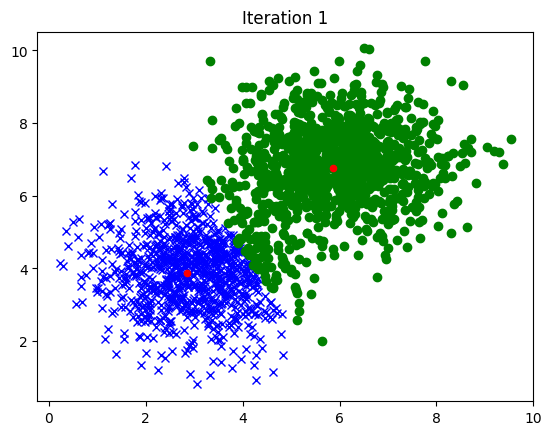

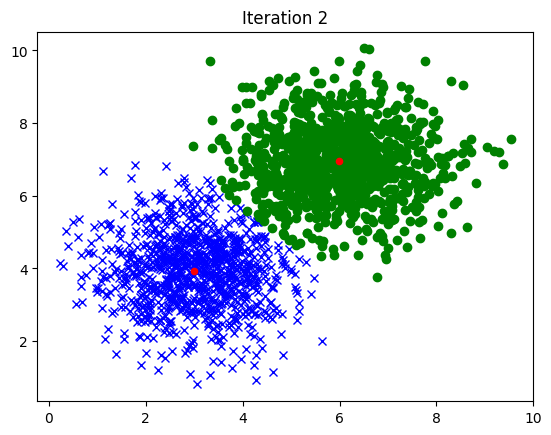

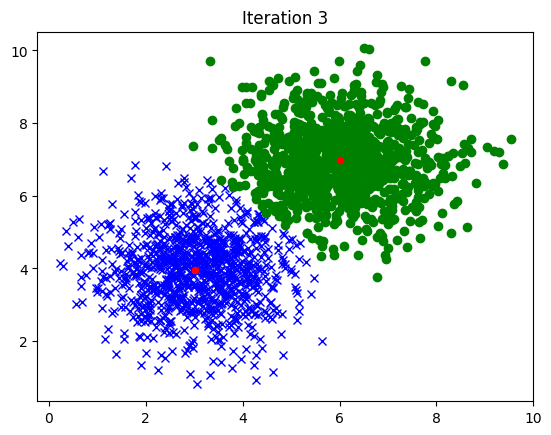

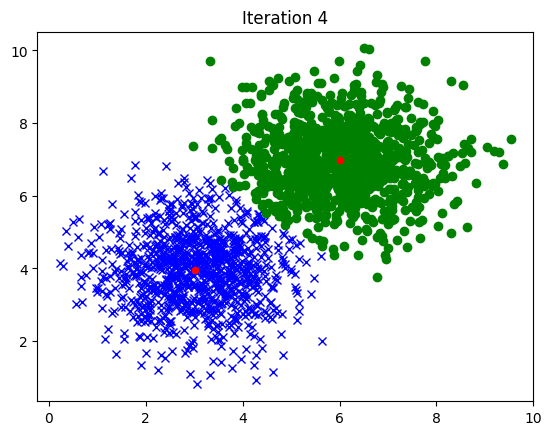

Converged in 5 iterations.


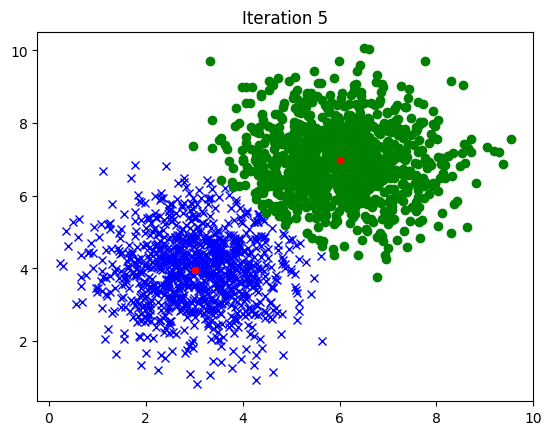

The centroids of classes are: [[6.01251236 6.99491821]
 [3.01569054 3.94255935]]


In [2]:
def plot(X, y, centroids, iteration=None):
    plt.figure()
    plt.plot(X[y==1, 0], X[y==1, 1], 'bx')
    plt.plot(X[y==0, 0], X[y==0, 1], 'go')
    plt.scatter(centroids[:,0], centroids[:,1], s = 20, color='r', zorder=2)
    if iteration != None:
        plt.title(f"Iteration {iteration}")
    plt.show()


def Kmeans(X, k, err, max_iters = 1000, plot_iters = []):
    m,n = X.shape
    indexes = np.random.randint(low=0, high=m-1, size=k)
    centroids = np.array([X[i].copy() for i in indexes])
    
    for it in range(1,max_iters+1):
        # Class assignment
        distance = np.zeros((m,k))
        for i in range(k):
            distance[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        classes = np.argmin(distance, axis=1)
        # Centroids update
        old_centroids = centroids
        centroids = np.zeros((k,n))
        for i in range(k):
            centroids[i,:] = X[classes==i].mean(axis=0)
        if np.linalg.norm(centroids - old_centroids) < err:
            print(f"Converged in {it} iterations.")
            if len(plot_iters) > 0 and plot_iters[-1] == -1:
                plot(X, classes, centroids, it)
            return centroids
        if it in plot_iters:
            plot(X, classes, centroids, it)
    

k = 2
err = 0.0001
max_iters = 1000
plot_iters = [1,2,3,4,-1]

print("The centroids of classes are:", Kmeans(X, k, err, max_iters, plot_iters))

# Use K-means from sklearn

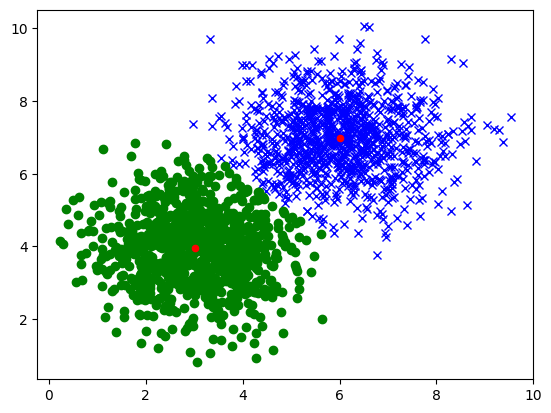

The centroids of classes are: [[3.01569054 3.94255935]
 [6.01251236 6.99491821]]


In [3]:
model = KMeans(n_clusters=2).fit(X)
plot(X, model.labels_, model.cluster_centers_)
print("The centroids of classes are:", model.cluster_centers_)